In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
%config InlineBackend.figure_format = 'retina'

In [2]:
from computations.insights.opinions import varying_evaluation_info
from plotting.basic import *
from plotting.summaries import *
from matplotlib import pyplot as plt
from computations.probabilistic.vectorised import *
from society.beliefs import BeliefDistribution, Distribution
from society.structure.network import ArtificialNetwork

In [3]:
information_source = (0.6, 0.3)

In [4]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.2)
belief_distribution = BeliefDistribution(unique, linespace)
network = ArtificialNetwork(30, "random_graph", p=0.2)
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
update_rule = UpdateRule(evaluation_bias=0.4)
interactions = Interactions(update_rule, interaction_rate=0, information_source=information_source)
insights = Insights()
simulation = Simulation(1000, insights)

In [5]:
simulation.run(interactions, agent_network)

Progress: 100%|██████████| 1000/1000 [00:00<00:00, 12008.08it/s]


In [6]:
evaluation = [0, 0.1, 0.6]
assimilation = [0, 0.02, 0.1]

In [7]:
beliefs = varying_evaluation_assimilation(evaluation, assimilation, agent_network, interactions, simulation)

Progress: 100%|██████████| 1000/1000 [00:00<00:00, 12006.09it/s]


/Users/martinprieto/Desktop/New_Honours_Refactored/src/plotting/summaries.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


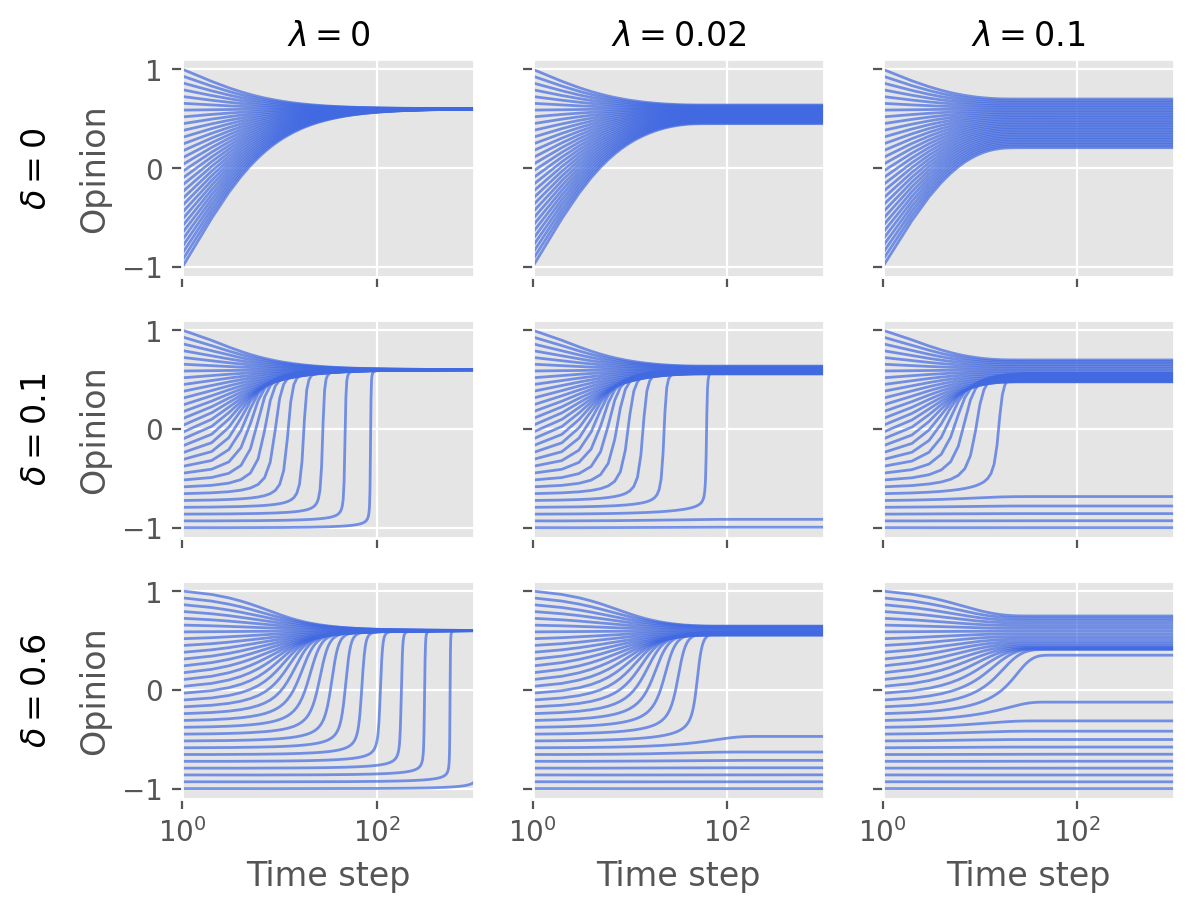

In [8]:
plot_varying_parameters(evaluation, assimilation, r'$\delta = {}$', r'$\lambda = {}$', beliefs)

In [13]:
information_sources = [(0.6,0.1), (0.6, 0.2), (0.6, 0.3), (0.6, 0.4)]
source_uncertainties = [0.1, 0.2,0.3,0.4]
simulation_results = []
interactions.update_rule.assimilation_bias = 0
for information_source in information_sources:
    interactions.information_source = information_source
    simulation.run(interactions, agent_network)
    simulation_results.append(simulation.insights.belief_evolution)

Progress: 100%|██████████| 1000/1000 [00:00<00:00, 11214.93it/s]


/Users/martinprieto/Desktop/New_Honours_Refactored/src/plotting/summaries.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


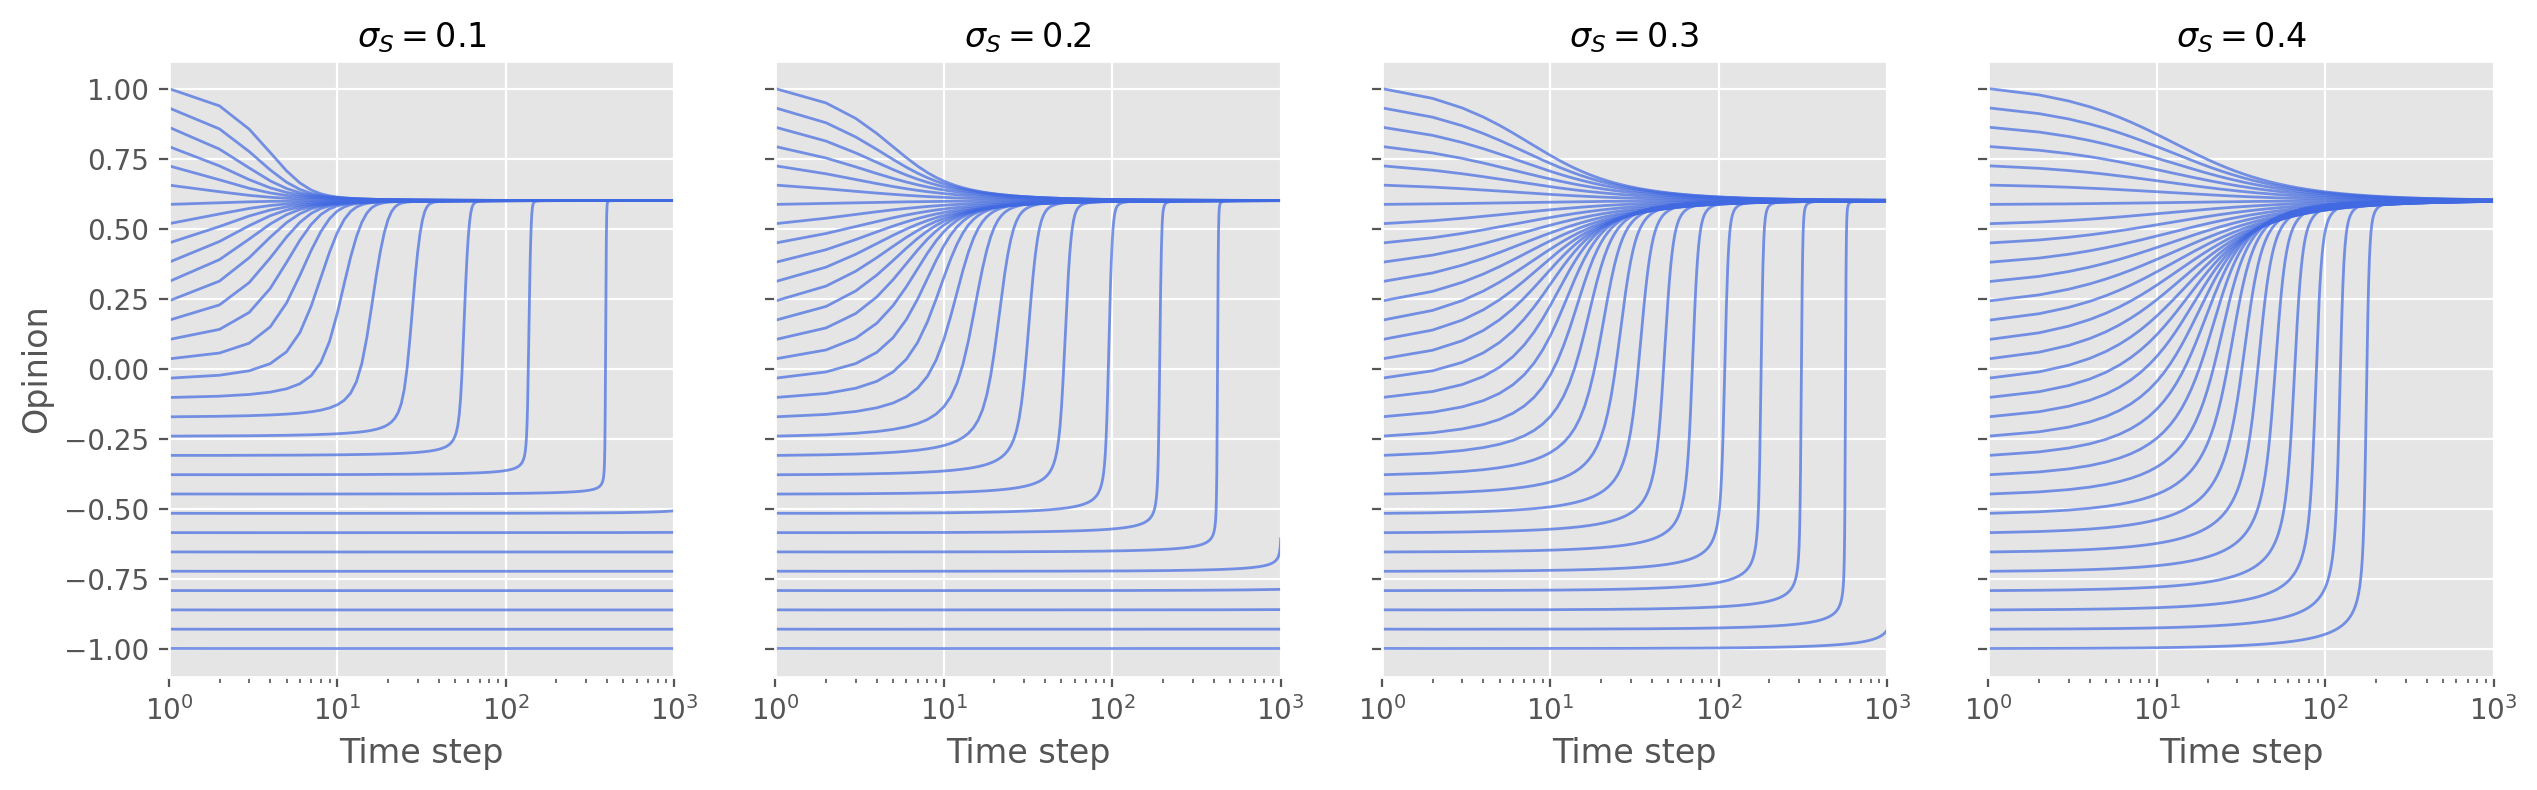

In [14]:
plot_varying_source_uncertainty(simulation_results, source_uncertainties)